In [33]:
pip install dmodule

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dmodule (from versions: none)
ERROR: No matching distribution found for dmodule


In [3]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [4]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
df = pd.read_csv(filepath, header=0)

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [6]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [7]:
y_data = df["Price"]
x_data = df.drop("Price", axis = 1)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size = 0.10 , random_state = 1) 
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 24
number of training samples: 214


In [9]:
lre = LinearRegression()
lre.fit(x_train[["CPU_frequency"]],y_train)
print(lre.score(x_test[['CPU_frequency']], y_test))
print(lre.score(x_train[['CPU_frequency']], y_train))

-0.06599437350393766
0.14829792099817973


In [10]:
Rcross = cross_val_score(lre , x_train[["CPU_frequency"]], y_train , cv = 4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.12738818019555026 and the standard deviation is 0.08317058010912008


In [12]:
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])    
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))

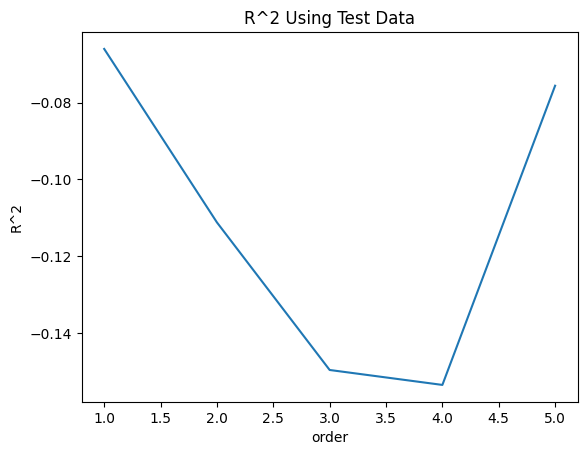

In [21]:
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]

for n in order:
    pr = PolynomialFeatures(degree=n)
    
    # Verileri polinoma çevir
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    
    # --- EKSİK KISIMLAR BURADAYDI ---
    
    # 1. Modeli eğit (Train verisiyle)
    lre.fit(x_train_pr, y_train)
    
    # 2. Test verisiyle R^2 skorunu hesapla
    score = lre.score(x_test_pr, y_test)
    
    # 3. Skoru listeye ekle (Listeyi dolduruyoruz)
    Rsqu_test.append(score)

# --- ÇİZİM KISMI DÖNGÜ DIŞINDA OLMALI (Girintiye Dikkat) ---
# Döngü bitti, liste doldu, şimdi çizebiliriz.
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.show()

In [23]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [25]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha) ### Yüklenme barı

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:03<00:00, 296.76it/s, Test Score=0.371, Train Score=0.634]


In [ ]:
Rsqu_train = [] -
Alpha = np.arange(0.001 , 1 ,0.001)
pbar= tqdm(Alpha)

for alpha in qbar:
    RidgeModel = Ridge(alpha = Alpha)
    RidgeModel.fit(x_train,y_train)
    test_score,train_score = Ridge.score(x_train,y_train)